In [106]:
import numpy as np
from package1 import energie
from package1 import valori_teorici
import matplotlib.pyplot as plt

In [107]:
#si inizializzano valori di g, M e L. Devono essere inseriti dall'utente 
g=9.81
L=1
M=1

#si indica il file.csv da cui estrarre i dati da analizzare
data = np.loadtxt('out_pendolo0_1.csv')

#si leggono e si salvano i valori d'interesse

time = data[:,1]
theta = data[:,2]
omega=data[:,3]
alpha=data[:,4]

thetaTh=[]
omegaTh=[]

en_cinetica=[]
en_potenziale=[]
energia_totale=[]

#aggiungo alle liste i valori teorici di theta e omega
for t in time:
    thetaTh.append(valori_teorici.theta_teorico(theta[0], omega[0], g, L, t))
    omegaTh.append(valori_teorici.omega_Teorico(theta[0], omega[0], g, L, t))  

e=[]
#per ogni istante venono calcolati i valori dell'energia cinetica, potenziale e totale 
for i in range(0, len(theta)):
    e.append((thetaTh[i]-theta[i])/max(thetaTh))
    en_cinetica.append(energie.energia_cinetica(omega[i], M, L))
    en_potenziale.append(energie.energia_potenziale(theta[i],g, M, L))
    energia_totale.append(en_cinetica[i]+en_potenziale[i])

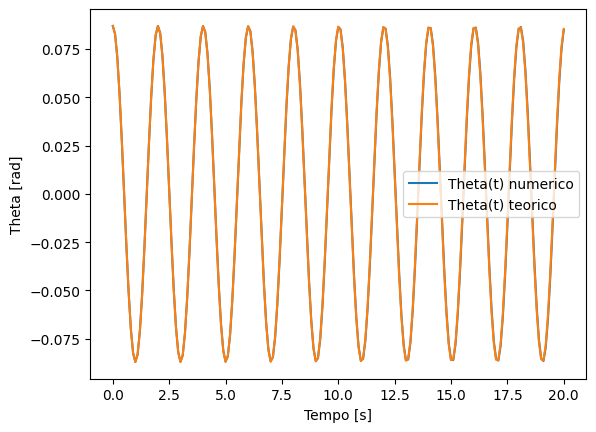

In [108]:
plt.plot(time, theta, label="Theta(t) numerico")
plt.plot(time, thetaTh, label="Theta(t) teorico")
plt.ylabel("Theta [rad]")
plt.xlabel("Tempo [s]")
plt.legend()

Text(0.5, 0, 'Tempo [s]')

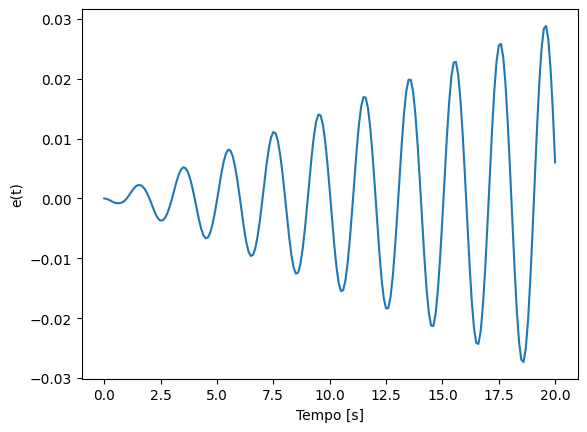

In [109]:
plt.plot(time, e)
plt.ylabel("e(t)")
plt.xlabel("Tempo [s]")

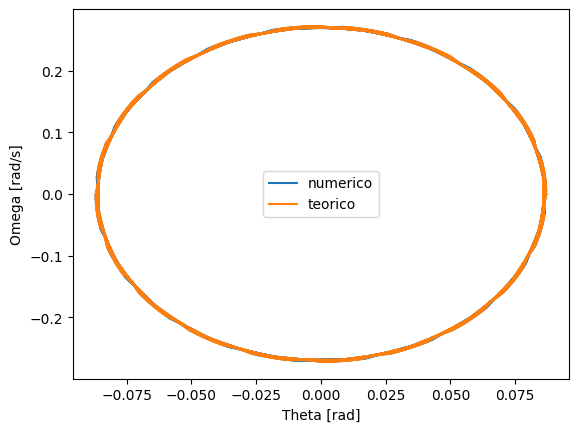

In [110]:
plt.plot(theta, omega, label="numerico")
plt.plot(thetaTh, omegaTh, '-', label="teorico")
plt.xlabel("Theta [rad]")
plt.ylabel("Omega [rad/s]")
plt.legend()

[np.float64(0.03710253371754958), np.float64(0.03710286676133926), np.float64(0.03710218777611229), np.float64(0.0371023969229603), np.float64(0.03710257764265729), np.float64(0.037102545515999015), np.float64(0.03710258147097962), np.float64(0.03710251894121437), np.float64(0.0371021466477622), np.float64(0.03710289480663341), np.float64(0.037102741920935656), np.float64(0.0371027420050992), np.float64(0.03710261096233329), np.float64(0.03710248346426387), np.float64(0.0371024315949545), np.float64(0.037102508442321776), np.float64(0.03710246450037895), np.float64(0.03710262613664765), np.float64(0.03710248256372028), np.float64(0.037102999223169286), np.float64(0.03710250982412054), np.float64(0.03710260795528354), np.float64(0.0371027223610169), np.float64(0.037102781743399094), np.float64(0.0371026953171), np.float64(0.037102432869527774), np.float64(0.03710247105843327), np.float64(0.03710271641471956), np.float64(0.03710235248124564), np.float64(0.0371029172160323), np.float64(0.

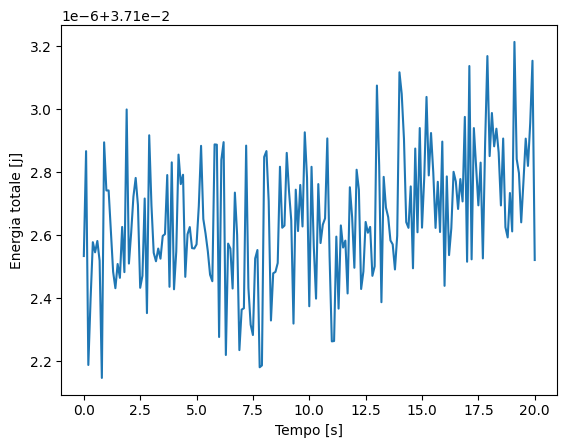

In [111]:
#si calcola il valore teorico dell'energia totale, dovrebbe rimanere costante nel corso della simulazione
energia_totale_teorica=energie.energia_cinetica(omega[0], M, L)+energie.energia_potenziale(theta[0], g, M,L)
plt.plot(time, energia_totale)
plt.ylabel("Energia totale [j]")
plt.xlabel("Tempo [s]")

print(energia_totale)
print(energia_totale_teorica)

#errore relativo energia totale 
print((max(energia_totale)-min(energia_totale))/max(energia_totale))
